## Store Database analysis and Insights

I have opted for Python as it has a powerful data libraries such as pandas, numpy, matplotlib etc. for better analytics and visualization. 


Before starting analysis there are steps that need to be done in order to confirm the accuracy and correctness of the informations in the tables. 

From my analysis of the dataset, the main check will be to confirm unrecorded product ids are found in the transactions. 

----------------------------------------------------

select prod_id from transactions where transactions.prod_id not in(select prod_id from products);

select prod_id from products where products.prod_id not in(select prod_id from  transactions);

---------------------------------------------------


This code assumes that you have converted the three tables to csv files and you have them in the same directory as this notebook file; These steps were done in order to convert these tables to csv;

---------------------------------------------------

sqlite> .header on

sqlite> .mode csv

sqlite> .output table-name.csv
    
sqlite> SELECT * table-name;

---------------------------------------------------


### Importing libraries

In [6]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

### Importing the dataset

In [11]:
products_dataset = pd.read_csv('products.csv')

transactions_dataset = pd.read_csv('transactions.csv')

segments_dataset = pd.read_csv('segments.csv')

### Finding missing values

In [12]:
products_dataset.isnull ().sum()

transactions_dataset.isnull ().sum()

segments_dataset.isnull ().sum()


cust_id        0
seg_name       0
update_at      0
active_flag    0
dtype: int64

### Checking the data types of each dataset

In [13]:
products_dataset.dtypes

prod_id       int64
prod_name    object
brand        object
category     object
dtype: object

In [14]:
transactions_dataset.dtypes

trans_id        int64
trans_dt       object
cust_id         int64
prod_id         int64
item_qty        int64
item_price    float64
dtype: object

In [15]:
segments_dataset.dtypes

cust_id         int64
seg_name       object
update_at      object
active_flag    object
dtype: object

## Finding Insights


#### Most Popular Products
Firstly we will find the most popular category of products in this store, this would indicate which products the store invests in

In [16]:
pd.value_counts(products_dataset['category'].values, sort=True)

Women          821
Make up        692
Men            230
Accessoires     89
Sun             31
dtype: int64

From this analysis, we can see that the most products are for Women and Make up. We can confirm that this store predominantly sell women items.

#### Sales trend and seasonality
We will now find out what month in the year has the highest sales, this would be based of the transactions' dataset. Although based on the time frame of the transactions' dataset (Jan - July 2016), it does seem like a small sample size to provide predictive analysis for forecasting. However, it is worth checking to see which months the store performed best in sales.

In [56]:
pd.to_datetime(transactions_dataset['trans_dt'])

0      2016-01-02 10:06:00
1      2016-01-02 10:30:00
2      2016-01-02 10:30:00
3      2016-01-02 11:33:00
4      2016-01-02 11:33:00
               ...        
2661   2016-06-18 10:00:00
2662   2016-06-18 10:00:00
2663   2016-06-18 10:00:00
2664   2016-06-18 17:51:00
2665   2016-06-18 12:34:00
Name: trans_dt, Length: 2666, dtype: datetime64[ns]

In [57]:
transactions_dataset['trans_dt'] = pd.to_datetime(transactions_dataset['trans_dt'])

In [58]:
transactions_dataset.dtypes

trans_id               int64
trans_dt      datetime64[ns]
cust_id                int64
prod_id                int64
item_qty               int64
item_price           float64
dtype: object

In [59]:
transactions_dataset['trans_dt_year_month'] = transactions_dataset['trans_dt'].dt.strftime('%Y-%m')

In [62]:
trans_data = transactions_dataset.groupby('trans_dt_year_month').size().reset_index().rename(columns={0: 'count_transactions'})

In [65]:
trans_data

,trans_dt_year_month,count_transactions
0,2016-01,1810
1,2016-02,161
2,2016-03,203
3,2016-04,206
4,2016-05,192
5,2016-06,94


In a graphical representation, we can view this as;

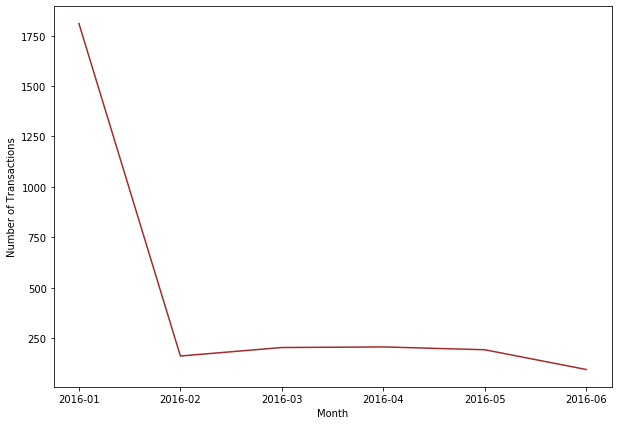

In [129]:
plt.figure(figsize=(10,7))
plt.plot(trans_data['trans_dt_year_month'], trans_data['count_transactions'], color='brown')
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

Based on the data available, January 2016 seem to be by far the most productive month in terms of sales and the overall sales showed a downward trend of sales. The store would have to further investigate why sales are not compared or close to January sales, either marketing & advertising measures are not as effective or the goods sold in the store January are seasonal (winter, autumn etc) hence why the spike during those times. 

#### Time allocation for employees

Based on the transactions' dataset, we can confirm what time most purchases are made and the time of day with the worst sales. 

In [60]:
transactions_dataset['trans_dt_time']= transactions_dataset['trans_dt'].dt.strftime('%HH')

In [63]:
trans_data_time = transactions_dataset.groupby('trans_dt_time').size().reset_index().rename(columns={0: 'count_timeoftransactions'})

In [64]:
trans_data_time

,trans_dt_time,count_timeoftransactions
0,00H,49
1,08H,1
2,09H,122
3,10H,292
4,11H,351
5,12H,408
6,13H,317
7,14H,260
8,15H,333
9,16H,270


In a graphical representation;

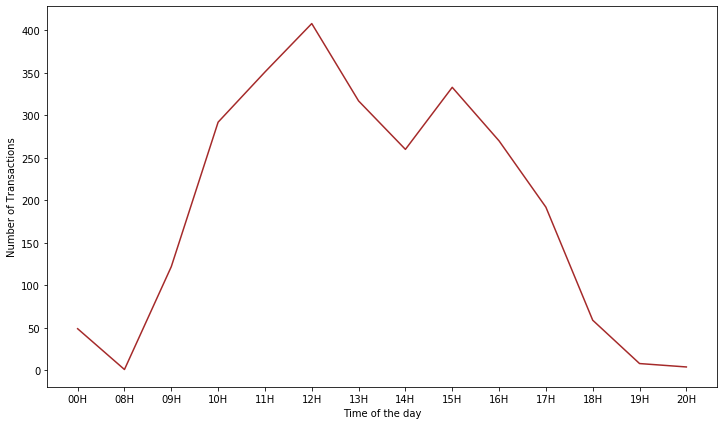

In [132]:
plt.figure(figsize=(12,7))
plt.plot(trans_data_time['trans_dt_time'], trans_data_time['count_timeoftransactions'], color='brown')
plt.xlabel("Time of the day")
plt.ylabel("Number of Transactions")
plt.show()

Based on the results of the analysis, you cannot definitely confirm the hours of operations because of the transactions at 12AM. However this would help in the scheduling of employees' shift, in order to maximize sales and improve customer satisfaction would be have sufficient employees during peak periods and avoid long queues. Also seems transactions after 9PM are non-existent based on this, it is advisable to make that the closing time to avoid losses.

In [71]:
#pd.value_counts(transactions_dataset['prod_id'].values, sort=True)

In [22]:
#transactions_dataset[transactions_dataset['prod_id']== 261231]

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price
56,57,2016-01-02 10:49:00,14800452,261231,1,24.99
579,580,2016-01-02 15:53:00,5456481,261231,1,24.99
642,642,2016-01-02 10:55:00,13131604,261231,1,24.99
746,747,2016-01-02 16:45:00,14847707,261231,1,24.99
1343,1344,2016-01-02 09:09:00,4109896,261231,1,24.99
1818,1819,2016-02-02 12:26:00,3568127,261231,1,24.99
2215,2216,2016-04-06 16:30:00,21232064,261231,2,24.99
2398,2399,2016-05-04 12:21:00,11043256,261231,1,24.99
2624,2625,2016-06-11 13:28:00,5456481,261231,1,24.99
2659,2659,2016-06-17 00:00:00,4548602,261231,2,24.99


#### Customer and Products Insights

This section just analyzes the different product categories and provide some insights as to which products and segments of customer provide the most revenue.

In [147]:
result= pd.merge(transactions_dataset, products_dataset, on='prod_id')

pd.value_counts(result['category'].values, sort=True)

Women          1231
Make up         938
Men             319
Accessoires     138
Sun              40
dtype: int64

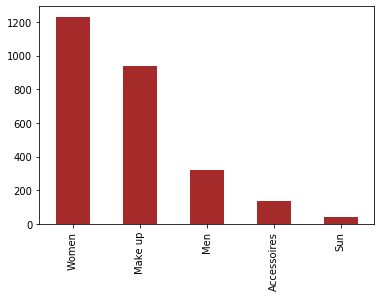

In [141]:
pd.value_counts(result['category'].values, sort=True).plot.bar(color='brown')

plt.show()

In [143]:
result['amount_spent']= result['item_qty']*result['item_price']

result[['item_price','category']]

,item_price,category
0,42.99,Make up
1,103.95,Women
2,74.99,Women
3,51.99,Women
4,51.99,Women
...,...,...
2661,73.99,Women
2662,49.99,Men
2663,30.99,Women
2664,89.99,Men


In [146]:
result[['category', 'amount_spent']].groupby('category').sum()

,amount_spent
category,
Accessoires,1756.86
Make up,26734.24
Men,16158.72
Sun,1268.74
Women,57269.78


In [113]:
result_item_amount = result[['category', 'item_price']].groupby('category').sum()

result_item_count =  result[['category', 'item_price']].groupby('category').count()

result_item_amount['item_price']/result_item_count['item_price']

category
Accessoires    12.363406
Make up        28.035096
Men            49.504389
Sun            29.889250
Women          45.440244
Name: item_price, dtype: float64

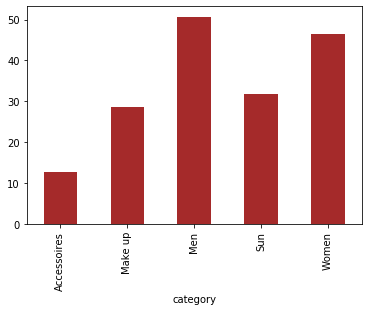

In [133]:
result.groupby('category').sum()

result_amount = result[['category', 'amount_spent']].groupby('category').sum()

result_count =  result[['category', 'amount_spent']].groupby('category').count()

#fig = plt.figure()

#ax = fig.add_axes([0,0,1,1])

fd= result_amount['amount_spent']/result_count['amount_spent']

fd.plot.bar(color='brown')

plt.show()



#result_amount['amount_spent']/result_count['amount_spent']


Highest revenue generating category is the Women, next to Make up. In a custom metric, revenue generated per transaction for each category it shows that the Men category provide more revenue per transaction (mean). However that's because its average price of an item in the Male category is slightly higher than the Women category but however based on the information provided I would say it is profitable to still have a men's category within the store based on this however an inventory record showing the number of each product and its sale price would clarify that.

In [117]:
trans_prod_seg = segments_dataset[segments_dataset['active_flag'] == 'Y'].merge(transactions_dataset, on='cust_id').merge(products_dataset, on='prod_id')

trans_prod_seg['TotalRevenue']=trans_prod_seg['item_qty']*trans_prod_seg['item_price']

temp_trans = trans_prod_seg.groupby(['seg_name','category'])['TotalRevenue'].sum().reset_index()

temp_trans_data = trans_prod_seg.groupby(['seg_name'])['TotalRevenue'].sum().reset_index()

temp_trans_data

#temp_trans


,seg_name,TotalRevenue
0,INFREQUENT,40607.13
1,LOYAL,32533.16
2,NEW,5939.92
3,ONE-OFFS,19708.89
4,VIP,49857.13


According to the data, the active segment that provides the most revenue is the VIP followed by INFREQUENT and the lowest are the NEW customers. This can help provide insights regarding the group to improve marketing strategy on and how to go about it, such as loyalty bonuses, VIP discounts etc.

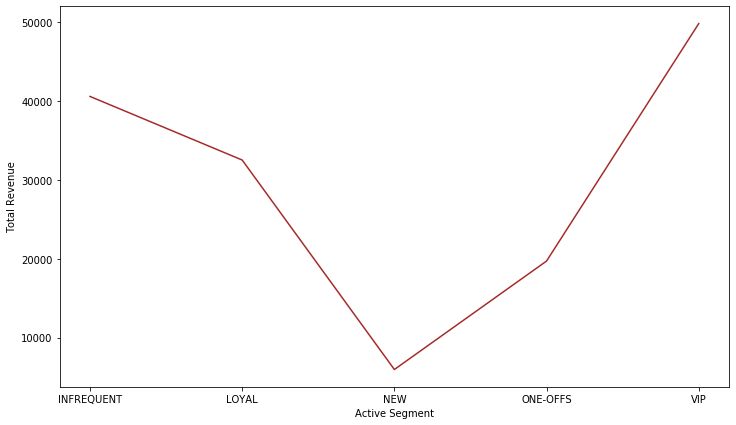

In [135]:
plt.figure(figsize=(12,7))
plt.plot(temp_trans_data['seg_name'], temp_trans_data['TotalRevenue'], color='brown')
plt.xlabel("Active Segment")
plt.ylabel("Total Revenue")
plt.show()